# ICBC话务数据 - 二元关系和多元关系
Weina Ma - January 25, 2018

## 分析方法
* 相关矩阵：描述任意两个变量的相关系数
* 散点图：描述任意两个变量间的分布关系
* 三维散点图：描述三个变量间的分布关系
* 主成分分析降维

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import missingno as msno
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.options.display.float_format = '{:.0f}'.format

#pd.set_option('display.max_colwidth',500)
df=pd.read_csv('/vagrant/gong_hang/callcenter/data/20180105_result.csv',encoding='gbk')
df.drop(["CALLING_NUM"], axis=1, inplace=True)
df.head()

,MEAN_INTERVAL_CALL,SD_INTERVAL_CALL,NUM_CALL,MEAN_DURATION,MOST_DURATION,MOST_DURATION_NUM,SD_DURATION,TOTAL_DURATION,TRK_NUM
0,2,0,3,66,66,1,33,192,1
1,24,18,3,252,216,1,99,870,2
2,1440,0,1,6,6,1,0,6,1
3,3,0,2,90,42,1,68,180,1
4,5,0,2,63,42,1,30,126,1


In [97]:
# (行数, 列数)
df.shape

(316827, 9)

In [98]:
# Missing values
df.isnull().sum()

MEAN_INTERVAL_CALL    0
SD_INTERVAL_CALL      0
NUM_CALL              0
MEAN_DURATION         0
MOST_DURATION         0
MOST_DURATION_NUM     0
SD_DURATION           0
TOTAL_DURATION        0
TRK_NUM               0
dtype: int64

In [99]:
df.describe()

,MEAN_INTERVAL_CALL,SD_INTERVAL_CALL,NUM_CALL,MEAN_DURATION,MOST_DURATION,MOST_DURATION_NUM,SD_DURATION,TOTAL_DURATION,TRK_NUM
count,316827,316827,316827,316827,316827,316827,316827,316827,316827
mean,999,5,2,140,143,1,25,213,1
std,649,31,1,126,136,0,61,233,0
min,0,0,1,0,0,1,0,0,1
25%,40,0,1,60,54,1,0,72,1
50%,1440,0,1,96,90,1,0,144,1
75%,1440,0,2,192,198,1,15,282,1
max,1440,688,117,5703,5556,104,3750,13128,13


### 1. 相关系数（全部数据）

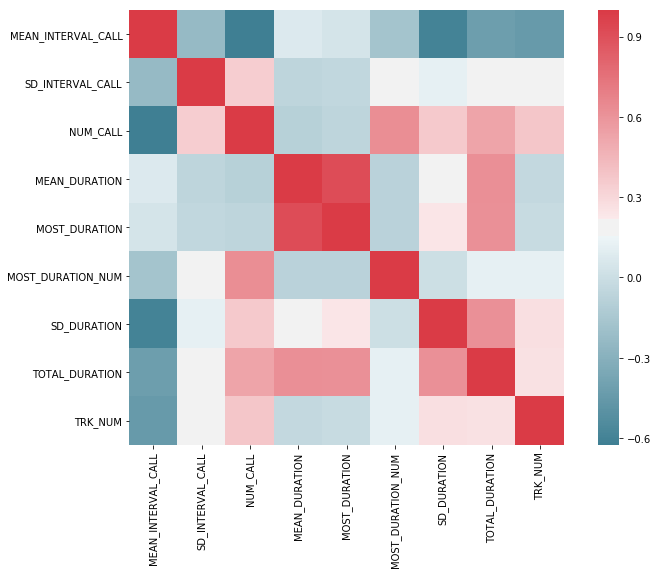

In [34]:
f, ax = plt.pyplot.subplots(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### 2. 散列图（全部数据）

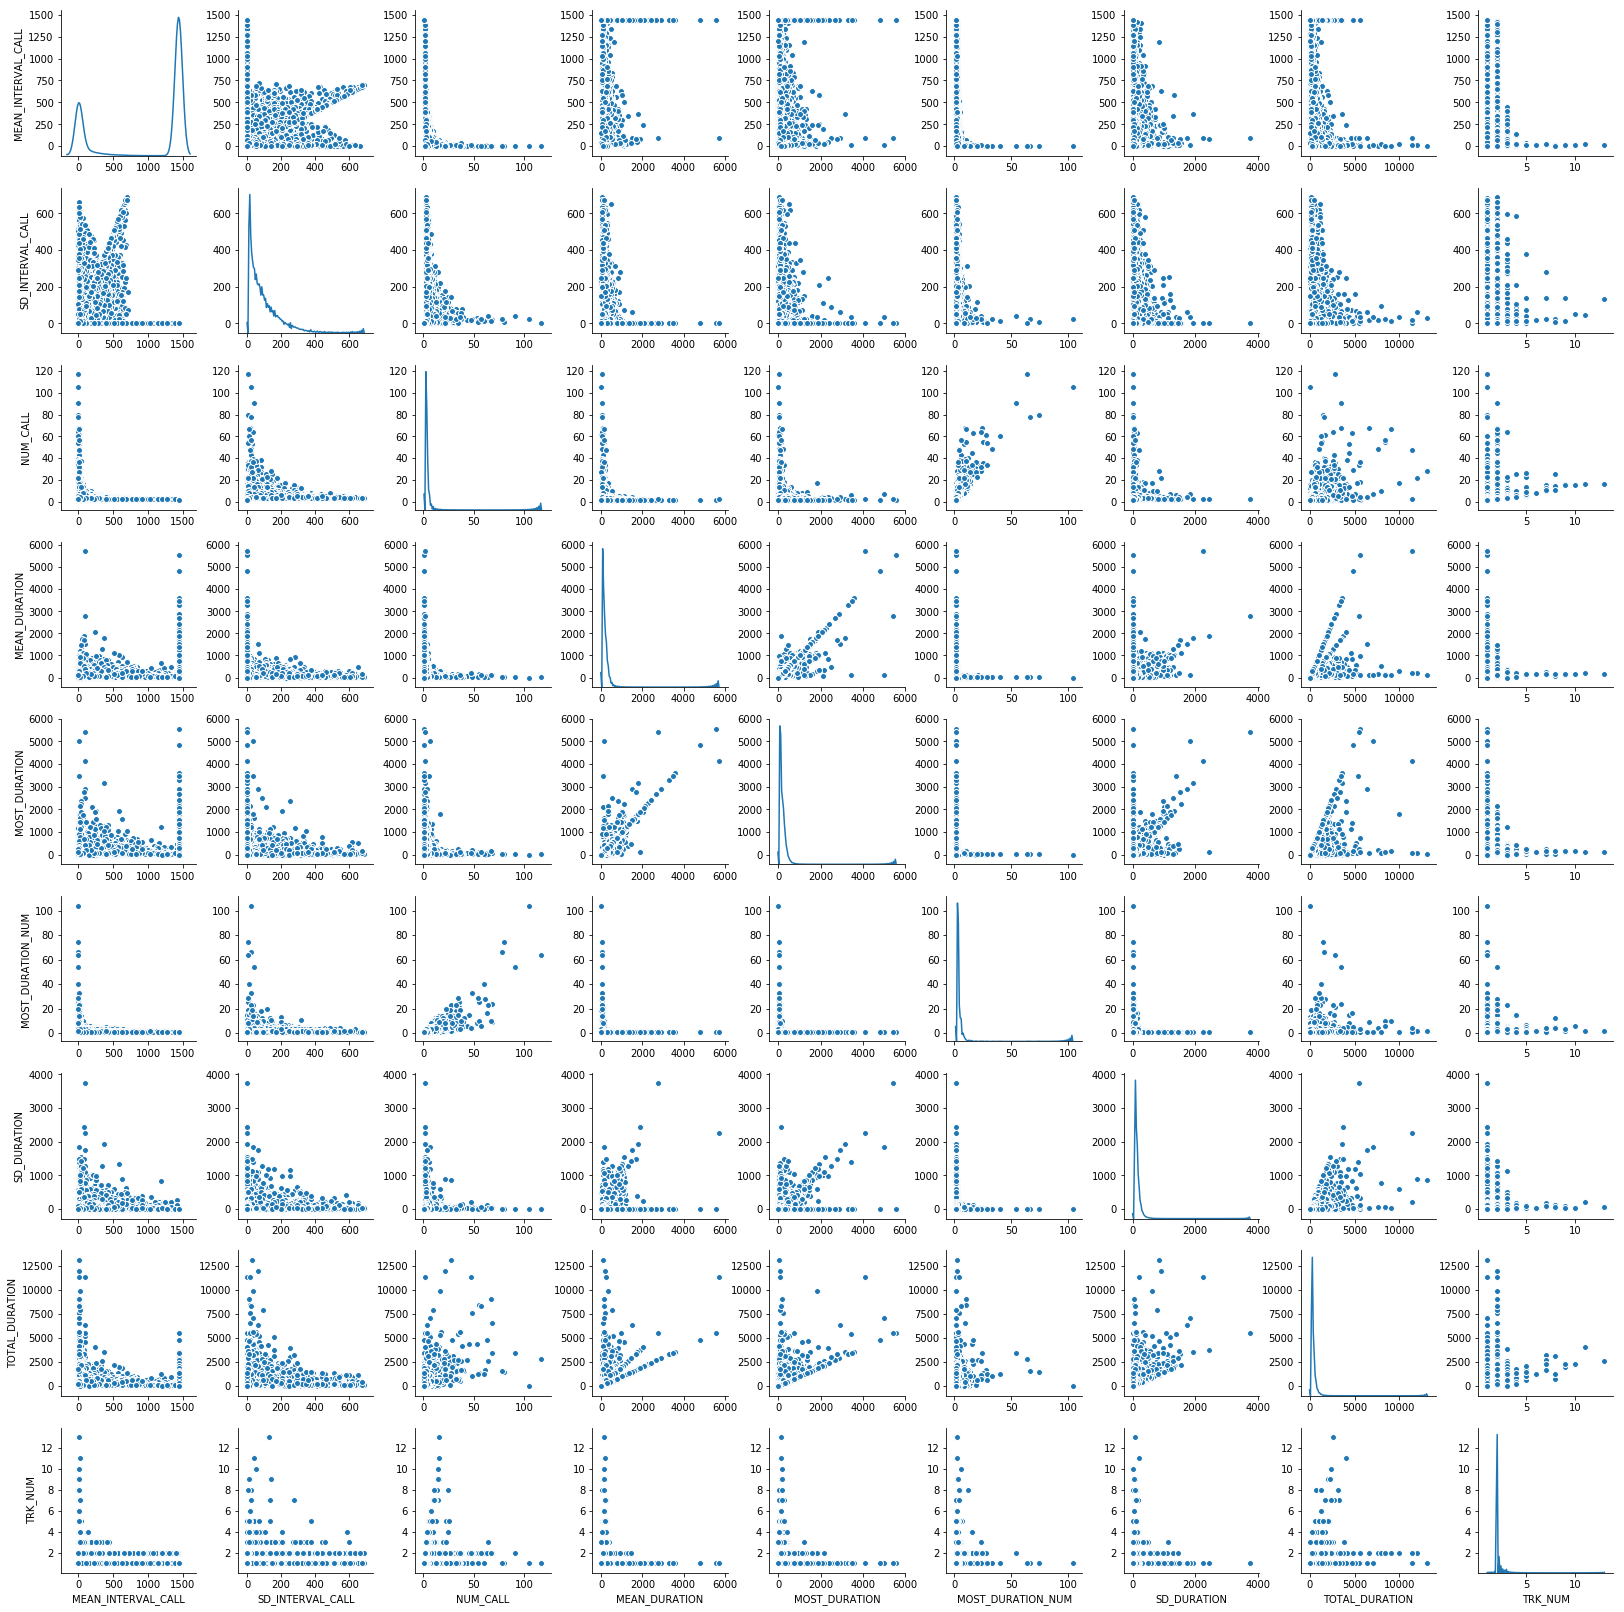

In [36]:
 sns.pairplot(df, diag_kind="kde")

### 3. 三维散列图（全部数据）

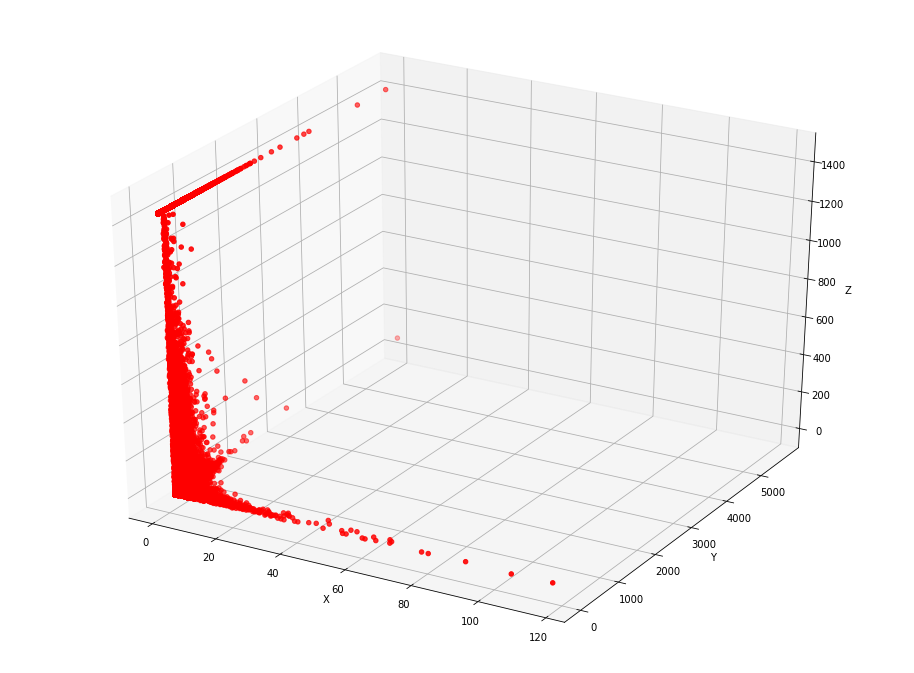

In [113]:
from mpl_toolkits.mplot3d import Axes3D
x, y, z = df['NUM_CALL'], df['MEAN_DURATION'], df['MEAN_INTERVAL_CALL']

fig = plt.pyplot.figure(figsize=(16,12))  
ax = plt.pyplot.subplot(111, projection='3d')  # 创建一个三维的绘图工程

ax.scatter(x, y, z, c='r')  # 绘制数据点
ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.pyplot.show()

### 4. 选取部分数据分析
* 相关矩阵
* 二维、三维散列图
* 主成分分析降维

In [101]:
df_1=df[df['NUM_CALL'] > 2]
#df_1=df_1[df_1['TRK_NUM'] > 1]
df_1=df_1[df_1['MEAN_INTERVAL_CALL'] <= 40]
df_1=df_1[(df_1['MEAN_DURATION'] <= 60) | (df_1['MEAN_DURATION'] >= 192)]
df_1=df_1[df_1['MOST_DURATION_NUM'] > 1]
df_1.shape

(3670, 9)

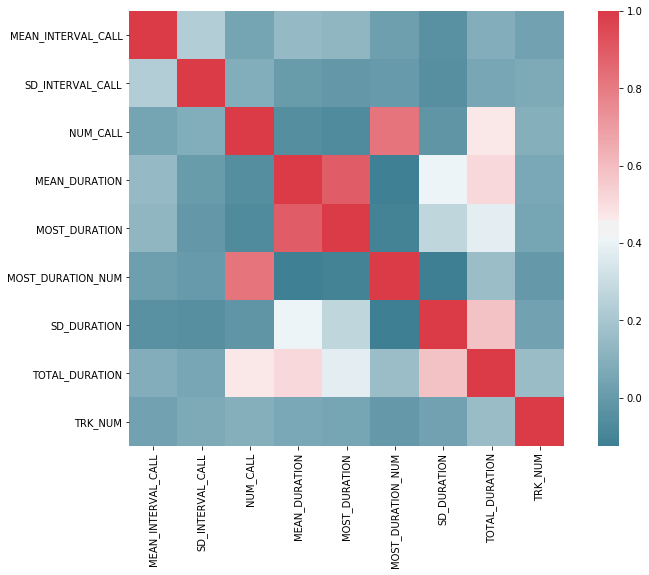

In [104]:
f, ax = plt.pyplot.subplots(figsize=(12, 8))
corr = df_1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

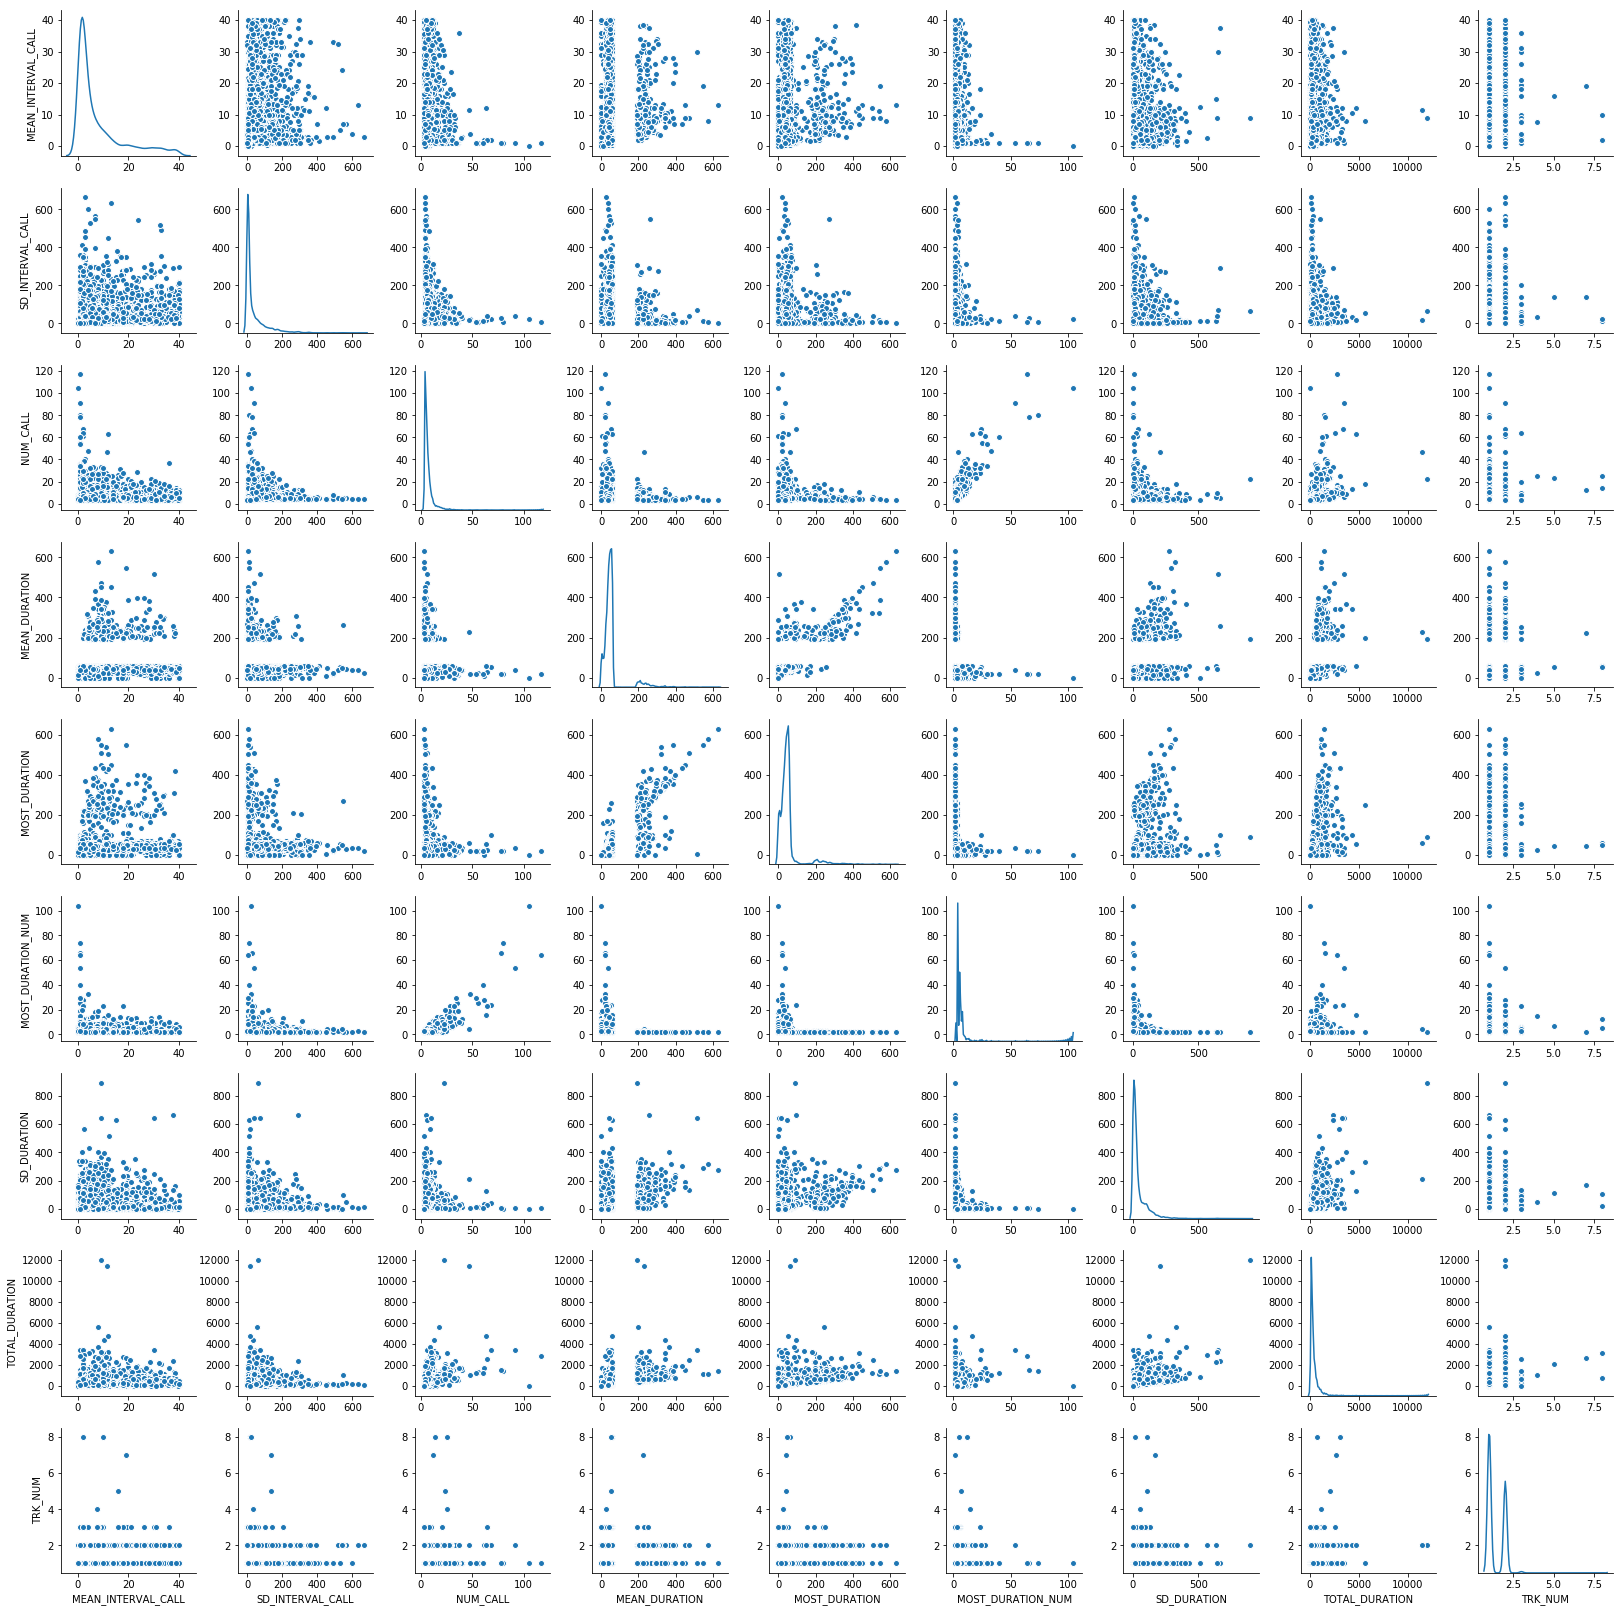

In [106]:
 sns.pairplot(df_1, diag_kind="kde")

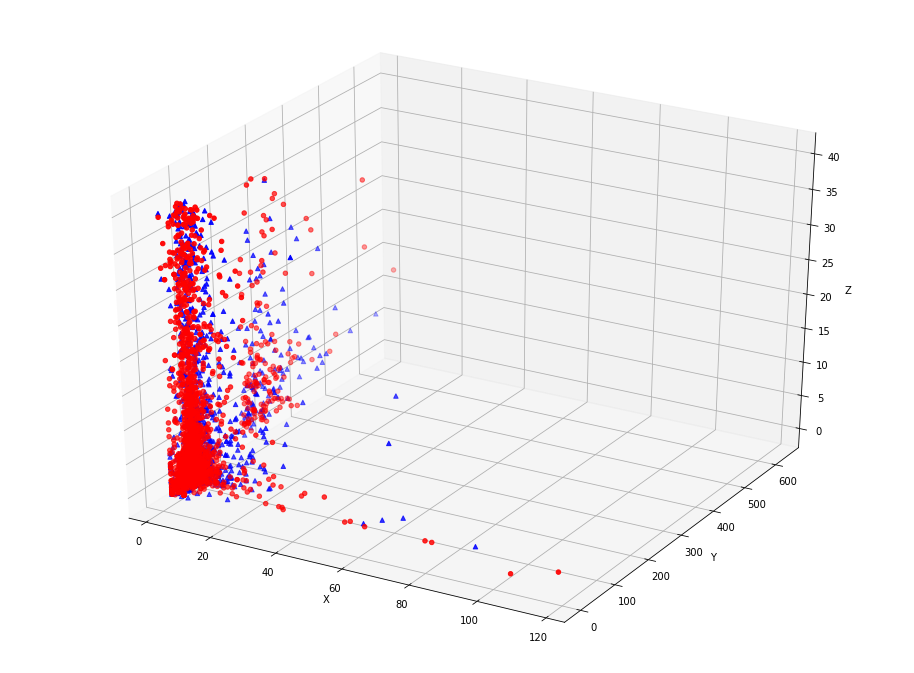

In [112]:
df1 = df_1[df_1['TRK_NUM']==1]
df2 = df_1[df_1['TRK_NUM']>1]
x1, y1, z1 = df1['NUM_CALL'], df1['MEAN_DURATION'], df1['MEAN_INTERVAL_CALL']
x2, y2, z2 = df2['NUM_CALL'], df2['MEAN_DURATION'], df2['MEAN_INTERVAL_CALL']

fig = plt.pyplot.figure(figsize=(16,12))  
ax = plt.pyplot.subplot(111, projection='3d')  # 创建一个三维的绘图工程
ax.scatter(x1, y1, z1, c='r', marker='o')
ax.scatter(x2, y2, z2, c='b', marker='^')
ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.pyplot.show()

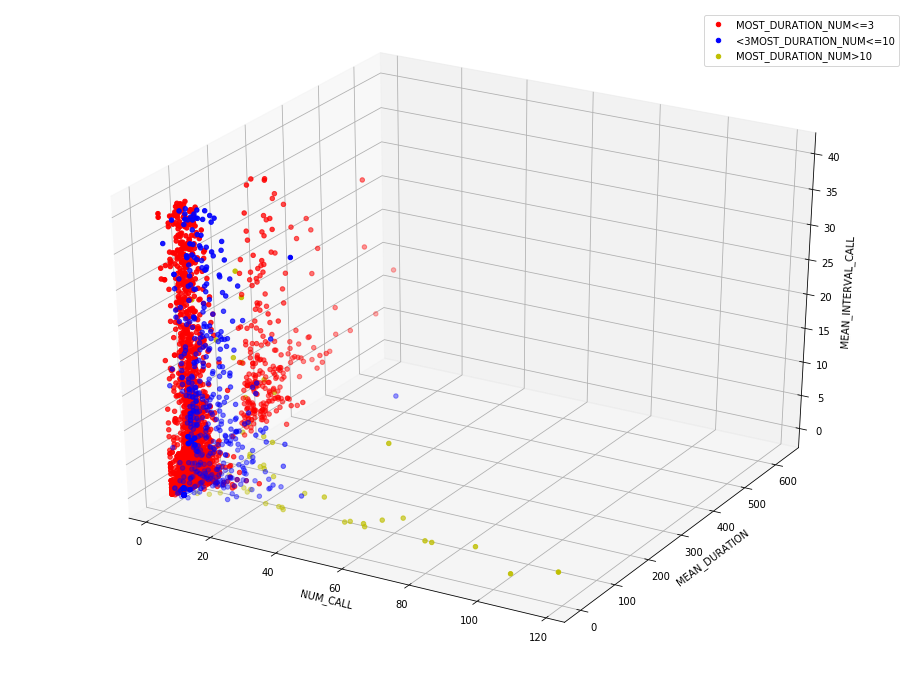

In [131]:
df1 = df_1[df_1['MOST_DURATION_NUM']<=3]
df2 = df_1[(df_1['MOST_DURATION_NUM']>3) & (df_1['MOST_DURATION_NUM']<=10)]
df3 = df_1[df_1['MOST_DURATION_NUM']>10]
x1, y1, z1 = df1['NUM_CALL'], df1['MEAN_DURATION'], df1['MEAN_INTERVAL_CALL']
x2, y2, z2 = df2['NUM_CALL'], df2['MEAN_DURATION'], df2['MEAN_INTERVAL_CALL']
x3, y3, z3 = df3['NUM_CALL'], df3['MEAN_DURATION'], df3['MEAN_INTERVAL_CALL']

fig = plt.pyplot.figure(figsize=(16,12))  
ax = plt.pyplot.subplot(111, projection='3d')  # 创建一个三维的绘图工程
scatter1 = ax.scatter(x1, y1, z1, c='r')
scatter2 = ax.scatter(x2, y2, z2, c='b')
scatter3 = ax.scatter(x3, y3, z3, c='y')
ax.set_zlabel('MEAN_INTERVAL_CALL')  # 坐标轴
ax.set_ylabel('MEAN_DURATION')
ax.set_xlabel('NUM_CALL')
ax.legend([scatter1, scatter2, scatter3], ['MOST_DURATION_NUM<=3', '<3MOST_DURATION_NUM<=10', 'MOST_DURATION_NUM>10'])
plt.pyplot.show()

[ 0.2896036   0.22282667  0.1399312   0.11213089  0.09865733  0.08079148
  0.03708692  0.01110158  0.00787034]


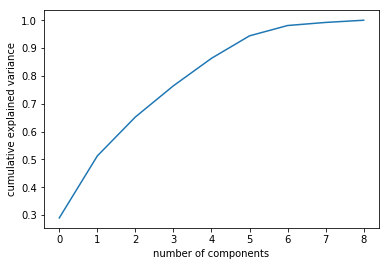

In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data = pd.DataFrame(scale(df_1))
pca = PCA().fit(data)
plt.pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
plt.pyplot.xlabel('number of components')
plt.pyplot.ylabel('cumulative explained variance');
print(pca.explained_variance_ratio_) 